In [1]:
!pip install pyGAM


     |████████████████████████████████| 1.8 MB 12 kB/s eta 0:00:017    |████▏                           | 235 kB 92 kB/s eta 0:00:18


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pygam import GAM, s, f, LogisticGAM
import numpy as np

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/m-clark/generalized-additive-models/master/data/pisasci2006.csv')

In [6]:
data

,Country,Overall,Issues,Explain,Evidence,Interest,Support,Income,Health,Edu,HDI
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,0.599,0.886,0.716,0.724
1,Argentina,391.0,395.0,386.0,385.0,567.0,506.0,0.678,0.868,0.786,0.773
2,Australia,527.0,535.0,520.0,531.0,465.0,487.0,0.826,0.965,0.978,0.920
3,Austria,511.0,505.0,516.0,505.0,507.0,515.0,0.835,0.944,0.824,0.866
4,Azerbaijan,382.0,353.0,412.0,344.0,612.0,542.0,0.566,0.780,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
60,Turkey,424.0,427.0,423.0,417.0,540.0,563.0,0.679,0.828,0.562,0.681
61,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,0.909,0.878,0.686,0.818
62,United Kingdom,515.0,514.0,517.0,514.0,464.0,470.0,0.833,0.934,0.798,0.853
63,United States,489.0,492.0,486.0,489.0,480.0,490.0,0.872,0.911,0.930,0.904


In [8]:
data = data.dropna()

In [9]:
data.head()

,Country,Overall,Issues,Explain,Evidence,Interest,Support,Income,Health,Edu,HDI
1,Argentina,391.0,395.0,386.0,385.0,567.0,506.0,0.678,0.868,0.786,0.773
2,Australia,527.0,535.0,520.0,531.0,465.0,487.0,0.826,0.965,0.978,0.920
3,Austria,511.0,505.0,516.0,505.0,507.0,515.0,0.835,0.944,0.824,0.866
5,Belgium,510.0,515.0,503.0,516.0,503.0,492.0,0.831,0.935,0.868,0.877
6,Brazil,390.0,398.0,390.0,378.0,592.0,519.0,0.637,0.818,0.646,0.695


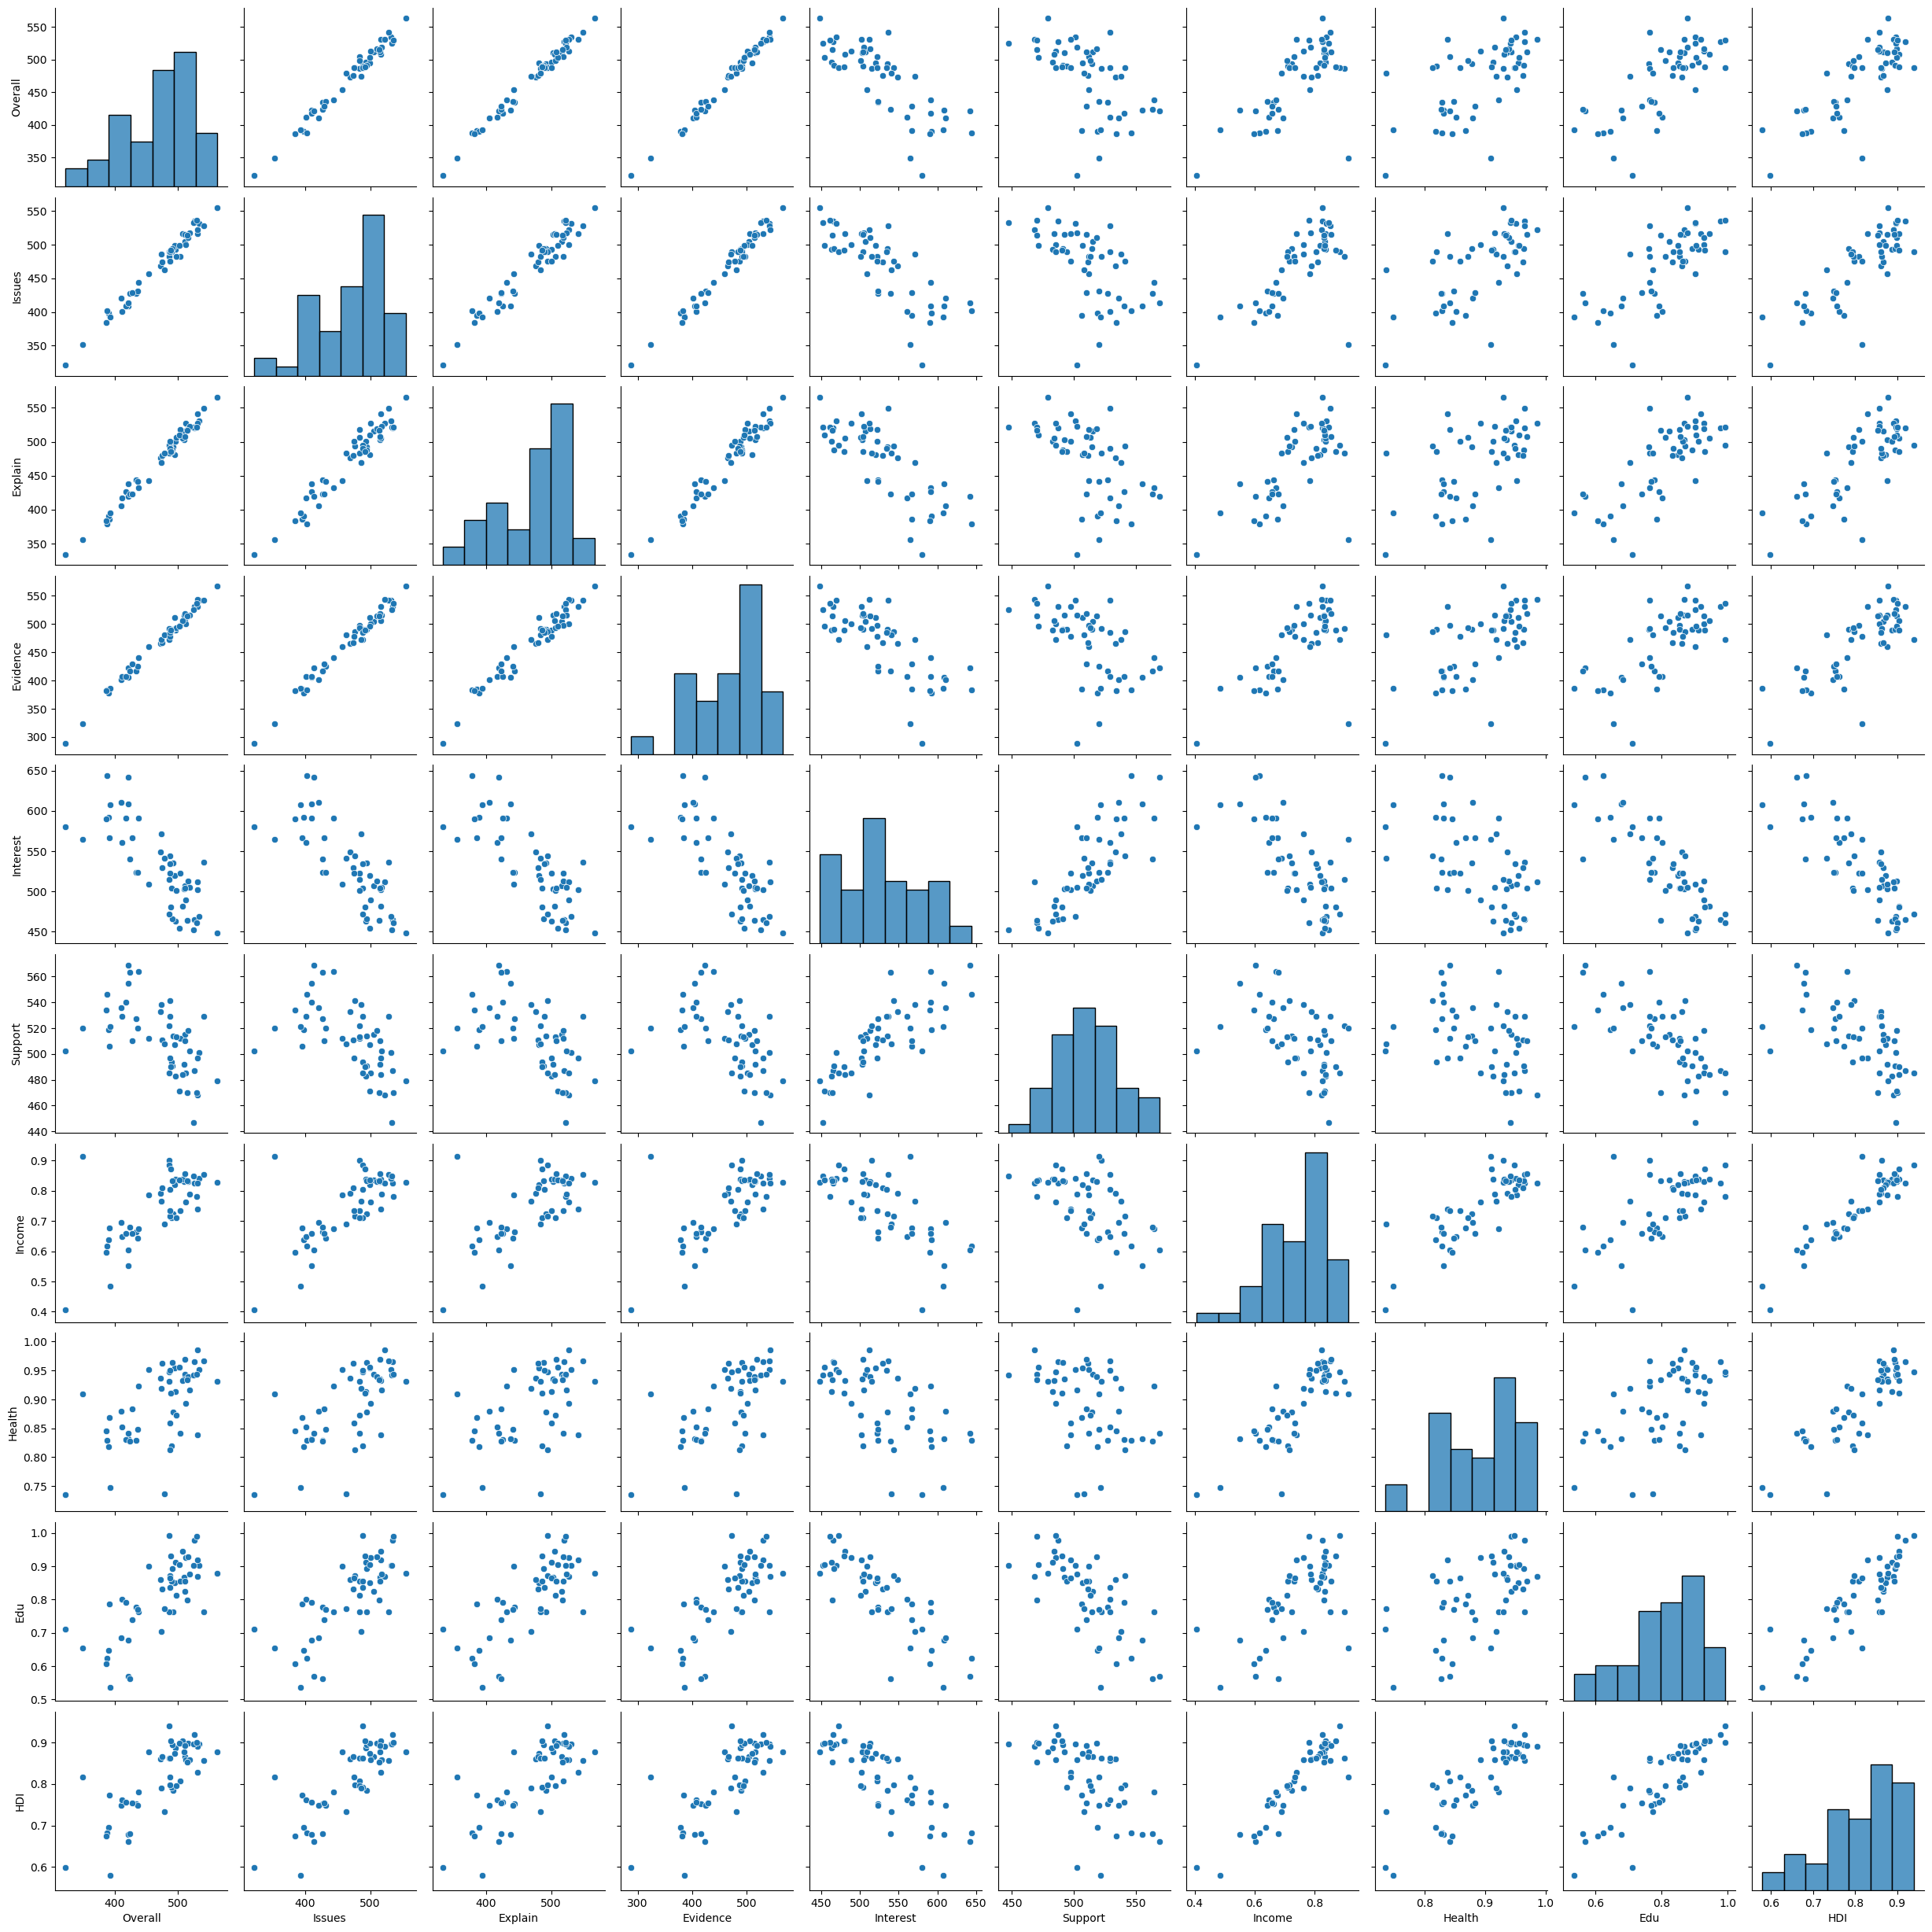

In [10]:
sns.pairplot(data)

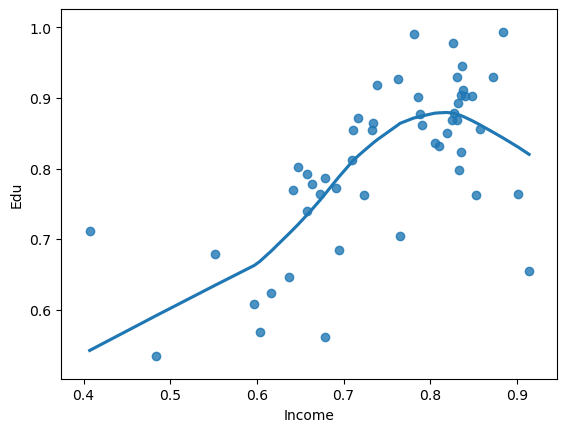

In [12]:
sns.regplot(x='Income', y='Edu', lowess=True, data=data)

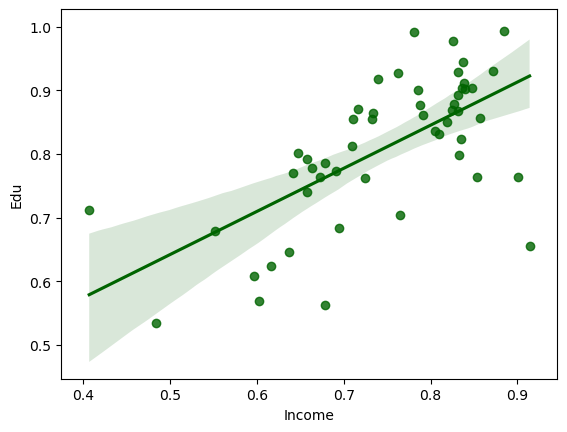

In [53]:
from IPython.display import FileLink
sns.regplot(x='Income', y='Edu', lowess=False, data=data, color='darkgreen')
plt.savefig(r'linear_regression.png')

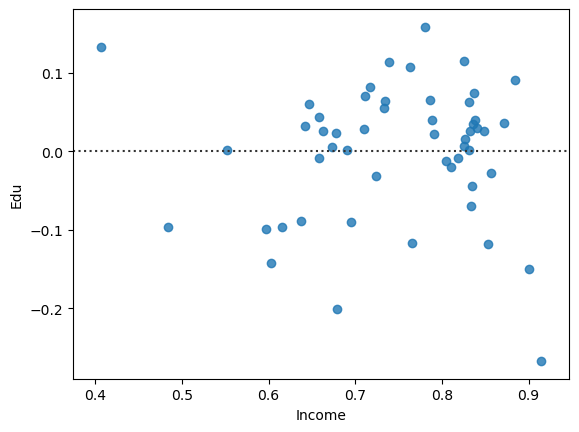

In [48]:
sns.residplot(x='Income', y='Edu', lowess=False, data=data)

## For modelling we should separate dataset to target (dependent variable) and predictors (independent variables)

In [18]:
y = data[['Edu']]

In [19]:
data.columns

Index(['Country', 'Overall', 'Issues', 'Explain', 'Evidence', 'Interest',
       'Support', 'Income', 'Health', 'Edu', 'HDI'],
      dtype='object')

In [20]:
x = data[['Interest','Support', 'Income', 'Health']]

## Let's fit our data with default characteristics.

In [23]:
first_fit = GAM().fit(x,y)

In [26]:
first_fit.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.5776
Link Function:                     IdentityLink Log Likelihood:                                 -4831.1718
Number of Samples:                           52 AIC:                                             9693.4987
                                                AICc:                                            9708.0792
                                                GCV:                                                0.0072
                                                Scale:                                              0.0037
                                                Pseudo R-Squared:                                   0.7866
Feature Function                  Lam

/tmp/ipykernel_45559/997306819.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  first_fit.summary()


In [27]:
second_fit = GAM(s(0)+s(1)+s(2)+s(3)).fit(x,y)

In [28]:
second_fit.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.5776
Link Function:                     IdentityLink Log Likelihood:                                 -4831.1718
Number of Samples:                           52 AIC:                                             9693.4987
                                                AICc:                                            9708.0792
                                                GCV:                                                0.0072
                                                Scale:                                              0.0037
                                                Pseudo R-Squared:                                   0.7866
Feature Function                  Lam

/tmp/ipykernel_45559/2235122502.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  second_fit.summary()


## Now that we have fitted our data, there needed graphic plot for right interpretation.
generate_X_grid() - thickness of the line - X-axis
partial_dependence() - calculates the line plus confidential intervals - y-axis


In [30]:
second_fit.generate_X_grid(term=3, n=100)

array([[0.        , 0.        , 0.        , 0.735     ],
       [0.        , 0.        , 0.        , 0.73753535],
       [0.        , 0.        , 0.        , 0.74007071],
       [0.        , 0.        , 0.        , 0.74260606],
       [0.        , 0.        , 0.        , 0.74514141],
       [0.        , 0.        , 0.        , 0.74767677],
       [0.        , 0.        , 0.        , 0.75021212],
       [0.        , 0.        , 0.        , 0.75274747],
       [0.        , 0.        , 0.        , 0.75528283],
       [0.        , 0.        , 0.        , 0.75781818],
       [0.        , 0.        , 0.        , 0.76035354],
       [0.        , 0.        , 0.        , 0.76288889],
       [0.        , 0.        , 0.        , 0.76542424],
       [0.        , 0.        , 0.        , 0.7679596 ],
       [0.        , 0.        , 0.        , 0.77049495],
       [0.        , 0.        , 0.        , 0.7730303 ],
       [0.        , 0.        , 0.        , 0.77556566],
       [0.        , 0.        ,

In [31]:
second_fit.generate_X_grid(term=0, n=100) #term - is a number of predictor and fuction 
#solely returns values for predictor chosen.

array([[448.        ,   0.        ,   0.        ,   0.        ],
       [449.97979798,   0.        ,   0.        ,   0.        ],
       [451.95959596,   0.        ,   0.        ,   0.        ],
       [453.93939394,   0.        ,   0.        ,   0.        ],
       [455.91919192,   0.        ,   0.        ,   0.        ],
       [457.8989899 ,   0.        ,   0.        ,   0.        ],
       [459.87878788,   0.        ,   0.        ,   0.        ],
       [461.85858586,   0.        ,   0.        ,   0.        ],
       [463.83838384,   0.        ,   0.        ,   0.        ],
       [465.81818182,   0.        ,   0.        ,   0.        ],
       [467.7979798 ,   0.        ,   0.        ,   0.        ],
       [469.77777778,   0.        ,   0.        ,   0.        ],
       [471.75757576,   0.        ,   0.        ,   0.        ],
       [473.73737374,   0.        ,   0.        ,   0.        ],
       [475.71717172,   0.        ,   0.        ,   0.        ],
       [477.6969697 ,   0

In [34]:
second_fit.partial_dependence(term=1, X=second_fit.generate_X_grid(term=1, n=100), width=0.9) 
# width is a confidential interval

[array([-0.00331739, -0.00422569, -0.00459355, -0.00436157, -0.00347035,
        -0.00186049,  0.0005272 ,  0.00369194,  0.00748995,  0.0117566 ,
         0.01632727,  0.02103731,  0.02572299,  0.0302675 ,  0.03462303,
         0.03874731,  0.04259806,  0.04613301,  0.04931453,  0.05219867,
         0.05492818,  0.0576491 ,  0.06050748,  0.06364935,  0.06720223,
         0.07110633,  0.0751931 ,  0.07929264,  0.08323505,  0.08685046,
         0.08998697,  0.09259544,  0.09466316,  0.09617745,  0.09712564,
         0.09749505,  0.09728435,  0.09653025,  0.09527743,  0.09357056,
         0.09145433,  0.0889733 ,  0.08615778,  0.08300914,  0.0795253 ,
         0.07570416,  0.07154361,  0.06704252,  0.06223429,  0.05719583,
         0.05200682,  0.04674695,  0.04149592,  0.03633547,  0.03137977,
         0.02676872,  0.02264294,  0.01914303,  0.0164096 ,  0.01455921,
         0.01350906,  0.01307778,  0.01308326,  0.01334344,  0.01367624,
         0.01393005,  0.01409882,  0.01421985,  0.0

In [35]:
def part_plot(model, X, y_label = 'Edu'):
    
    for i, term in enumerate(model.terms): #проходимся циклом по всем предиктором с их нумерацией
        if term.isintercept:
            continue #интерсепт не рисуем

        XX = model.generate_X_grid(term=i) #задаём разрешение для конкретного предиктора
        pdep, confi = model.partial_dependence(term=i, X=XX, width=0.95) #расчёт линии и доверительного интервала (95%)

        plt.figure() #задаём график
        plt.plot(XX[:, term.feature], pdep) #рисуем линию
        plt.plot(XX[:, term.feature], confi, c='r', ls='--') #рисуем доверительный интервал
        plt.title(X.columns[i]) #заголовок
        plt.ylabel(y_label) #подпись y-оси
        plt.show()

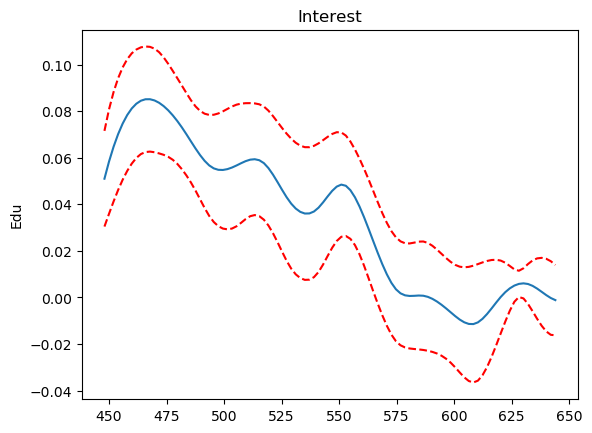

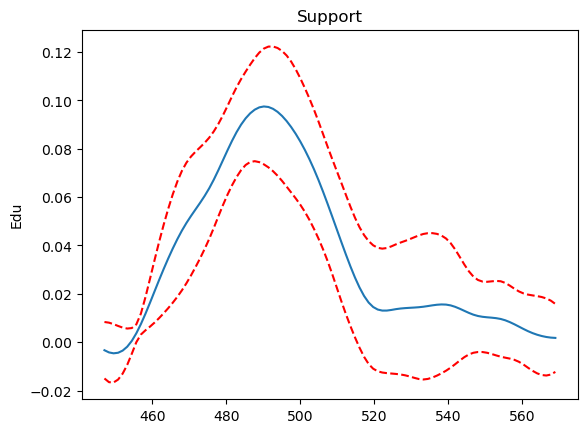

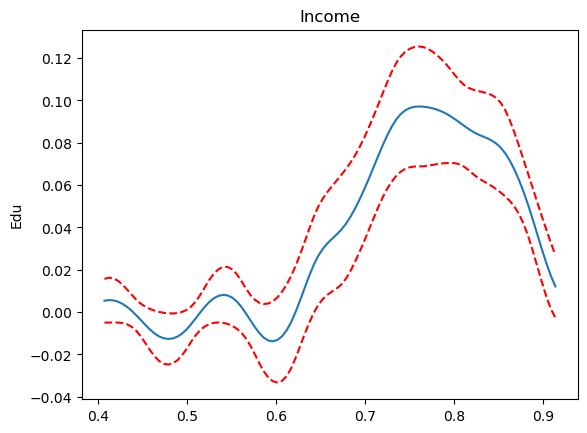

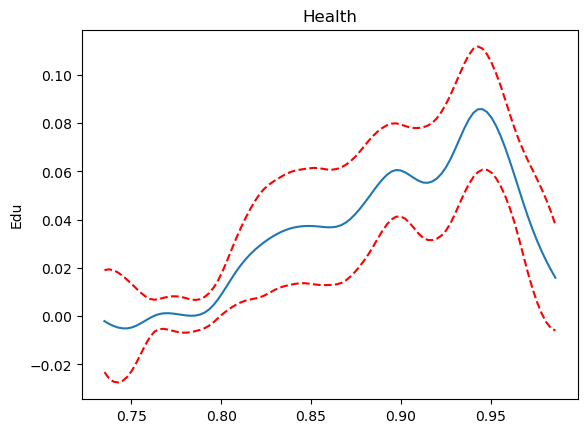

In [36]:
part_plot(second_fit, x)

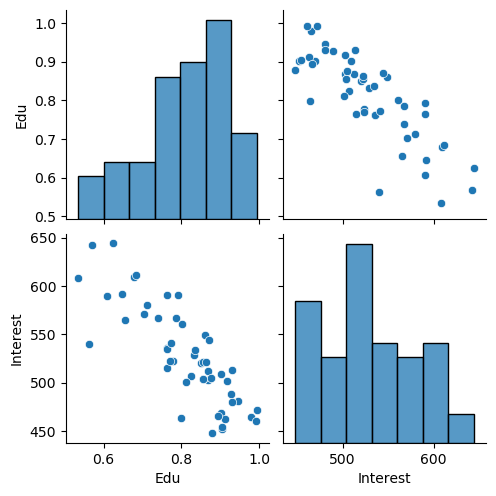

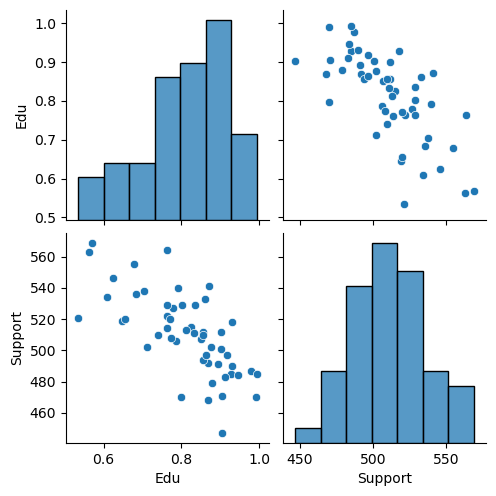

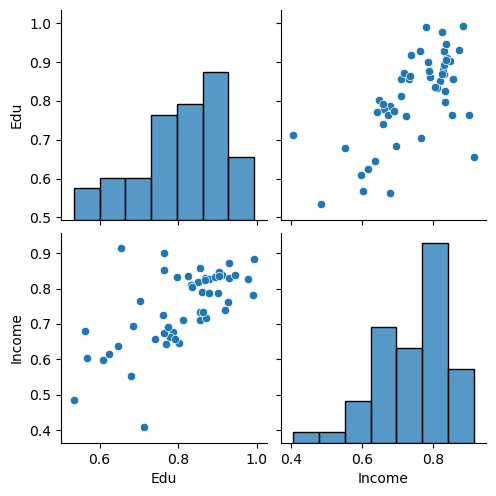

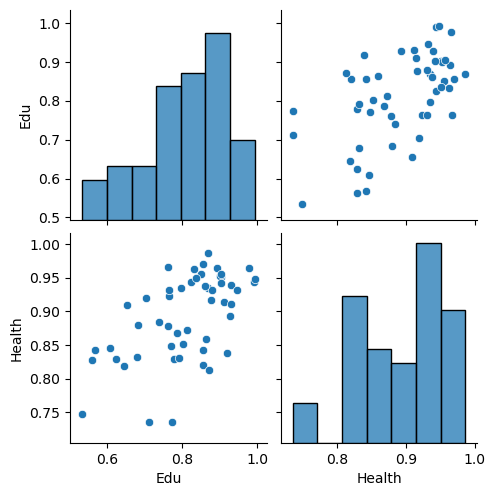

In [46]:
   
sns.pairplot(data[['Edu', 'Interest']])
sns.pairplot(data[['Edu', 'Support']])
sns.pairplot(data[['Edu', 'Income']])
sns.pairplot(data[['Edu', 'Health']])